<a href="https://colab.research.google.com/github/ZachPetroff/Babybot/blob/master/examples/Mobile_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code can be used to add a folder in the repository to the Python import
# path, irrespective of whether the notebook is being run in colab or Jupyter.
# (C) 2020 Abe Leite, Indiana University Bloomington
# This code block is released under MIT license. Feel free to make use of
# this code in any projects so long as you reproduce this text.

import os
import sys
import subprocess

repo_URL = 'https://github.com/ZachPetroff/Babybot'
repo_name = repo_URL.split('/')[-1]
code_folder = ''

try:
  repo_path = subprocess.check_output('git rev-parse --show-toplevel', shell=True).decode().strip()
except subprocess.CalledProcessError:
  os.system(f'git clone {repo_URL} --depth 1')
  repo_path = os.path.abspath(repo_name)

code_path = os.path.join(repo_path, code_folder)
sys.path.append(code_path)
print(f'Loading code from {code_path}')

Loading code from /content/Babybot/


# Biological Reference (Rovee-Collier, et al. 1978)
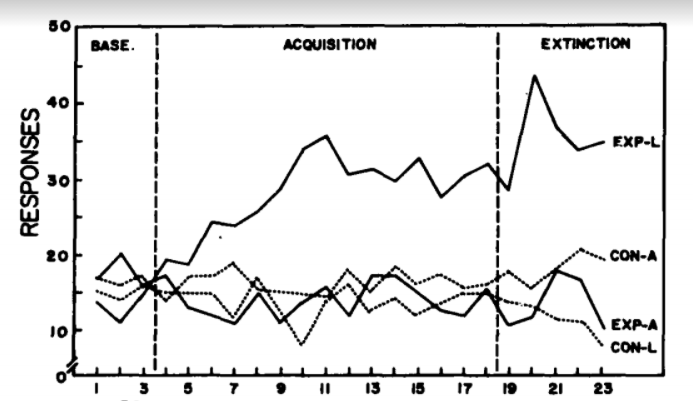

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import main
import graph
import simulation

In [ ]:
reward = 6e-2 #@param
cost = 3e-2 #@param

# simulate, while extracting key values
output = simulation.simulate(rates=[20, 20, 20, 20], reward=reward, cost=cost, mobile_on=True)

# list of extracted information
simulation.display_output(output)

# Movements Over Time
During the connected phase, limb movements increase, until they plateau
at about minute thirty. This increase in movements is due to the contingent 
reward provided by moving the connected limb, and thus, moving the mobile.
The reason for the plataeu is explained below. 

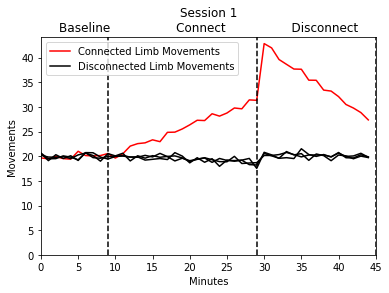

In [ ]:
graph.plot_movements(output["separations"], output["connection changes"], output["minutes"], output["right arm movements"], output["left arm movements"], output["right leg movements"], output["left leg movements"])

# Connected Limb Rates
As shown in the plot below, the rates while the mobile is not moving
plataeu around the same time as the movements plataeu. During this period
the rates while the mobile is moving continue to slightly decrease. 
The plateau in movements is caused by the combination of these rates,
which is why the movements end up somewhere inbetween these two, at 
around 30. 


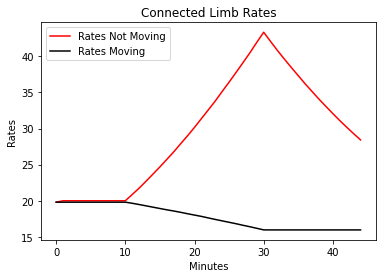

In [ ]:
graph.plot_rates(output["minutes"], output["still mobile rates"], output["moving mobile rates"])

# Halfway Through Connect Phase
The plot below displays that the babybot learns, during the 
connected phase, to kick while the mobile is not moving, then 
wait for it to stop moving again until it kicks again 
(with a few exceptions), in order to preserve energy.

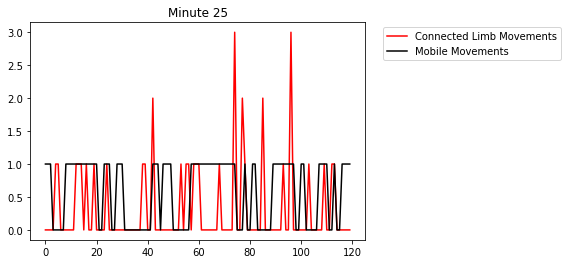

In [ ]:
output["connect limb movements per timestep"] = output["connect limb movements per timestep"][2:]
graph.plot_minute(25, output["connect limb movements per timestep"], output["mobile movements per timestep"], output["timestep"])

# The Beginning of the Disconnect Phase
This plot shows what occurs right after the disconnected phase. The 
babybot kicks become more frequent, in hopes that the mobile will begin 
to move again. However, because the mobile does not move, the babybot 
continues to kick.

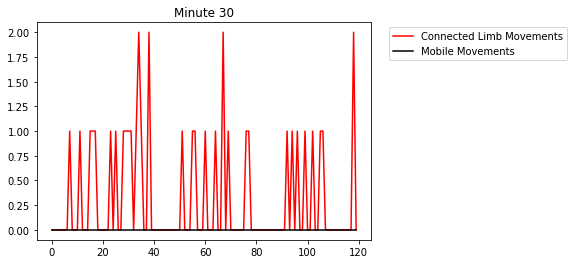

In [ ]:
graph.plot_minute(30, output["connect limb movements per timestep"], output["mobile movements per timestep"], output["timestep"])